In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot

In [2]:

pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
df=pd.read_excel('google_final.xlsx')
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
dataset_train = train_data
training_set = dataset_train.iloc[:, [1,2,3,4,5,7]].values

In [4]:
len(training_set)

1007

In [5]:
# df.isnull().values.any()
# df = df.dropna()
# print(df)

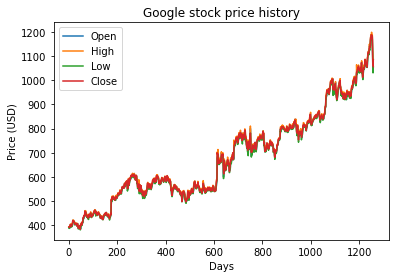

In [21]:
plt.figure()
plt.plot(df["open"])
plt.plot(df["high"])
plt.plot(df["low"])
plt.plot(df["close"])
plt.title('Google stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.show()

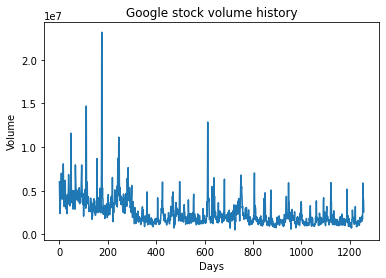

In [22]:
plt.figure()
plt.plot(df["volume"])
plt.title('Google stock volume history')
plt.ylabel('Volume')
plt.xlabel('Days')
plt.show()

0          393.0777
1          784.6789
2         1175.4192
3         1567.2406
4         1961.5445
           ...     
1254    854610.9836
1255    855730.1836
1256    856792.5736
1257    857877.0036
1258    858932.4136
Name: close, Length: 1259, dtype: float64
            date       open       high        low      close   volume   Name  \
0     2013-02-08   390.4551   393.7283   390.1698   393.0777  6031199  GOOGL   
1     2013-02-11   389.5892   391.8915   387.2619   391.6012  4330781  GOOGL   
2     2013-02-12   391.2659   394.3440   390.0747   390.7403  3714176  GOOGL   
3     2013-02-13   390.4551   393.0677   390.3750   391.8214  2393946  GOOGL   
4     2013-02-14   390.2549   394.7644   389.2739   394.3039  3466971  GOOGL   
...          ...        ...        ...        ...        ...      ...    ...   
1254  2018-02-01  1175.9900  1187.4500  1169.3600  1181.5900  3675709  GOOGL   
1255  2018-02-02  1127.4200  1131.3000  1111.1700  1119.2000  5892122  GOOGL   
1256  2018-02-05  

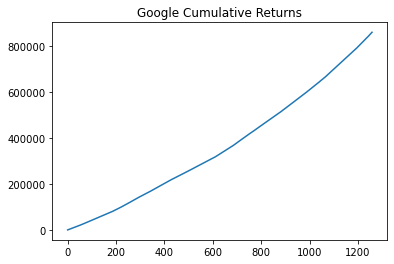

In [6]:
dr = df['close'].cumsum()
print(dr)
dr.plot()
plt.title('Google Cumulative Returns')
print(df)

Text(0.5, 1.0, 'Google Autocorrelation plot')

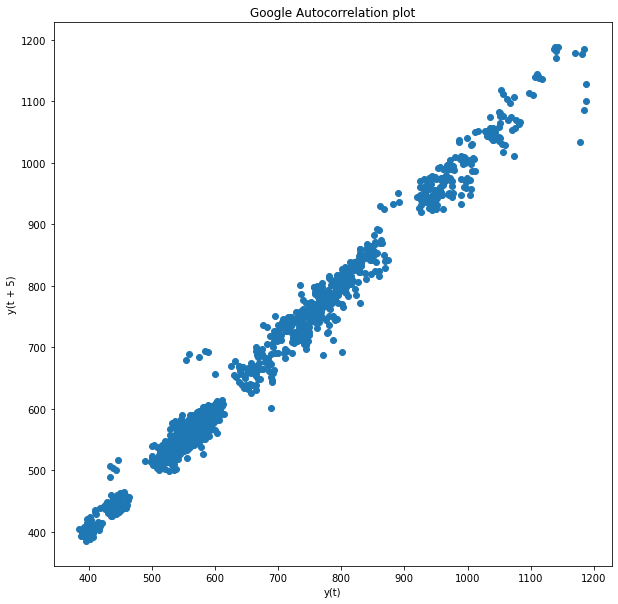

In [7]:
plt.figure(figsize=(10,10))
lag_plot(df['open'], lag=5)
plt.title('Google Autocorrelation plot')

In [8]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set = sc.fit_transform(training_set)

In [9]:
training_set_scaled = training_set

In [10]:
X_train = []
y_train = []
for i in range(60, 1007):
    X_train.append(training_set_scaled[i-60:i, :])
    y_train.append(training_set_scaled[i, 3])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.array(X_train)
print(X_train.shape)

(947, 60, 6)


In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import RMSprop, Adam

In [12]:
regressor = Sequential()

regressor.add(LSTM(units = 100, dropout=0.0, kernel_initializer='random_uniform', recurrent_dropout=0.0, return_sequences = True, input_shape = ( 60, 6)))
regressor.add(Dropout(0.4))

# regressor.add(LSTM(units = 50, return_sequences = True))
# regressor.add(Dropout(0.2))

# regressor.add(LSTM(units = 50, return_sequences = True))
# regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 60, dropout=0.0))
regressor.add(Dropout(0.4))

regressor.add(Dense(units = 20, activation='relu'))
regressor.add(Dense(units = 20, activation='relu'))

opt = Adam(lr=0.0001)

regressor.compile(optimizer = opt, loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 150, batch_size = 20)

Epoch 1/150
48/48 [==============================] - 4s 26ms/step - loss: 0.2946
Epoch 2/150
48/48 [==============================] - 1s 25ms/step - loss: 0.1640
Epoch 3/150
48/48 [==============================] - 1s 27ms/step - loss: 0.1354
Epoch 4/150
48/48 [==============================] - 1s 27ms/step - loss: 0.1082
Epoch 5/150
48/48 [==============================] - 1s 26ms/step - loss: 0.0846
Epoch 6/150
48/48 [==============================] - 1s 26ms/step - loss: 0.0757
Epoch 7/150
48/48 [==============================] - 1s 26ms/step - loss: 0.0638: 0s - los
Epoch 8/150
48/48 [==============================] - 1s 29ms/step - loss: 0.0594
Epoch 9/150
48/48 [==============================] - 1s 29ms/step - loss: 0.0522
Epoch 10/150
48/48 [==============================] - 1s 28ms/step - loss: 0.0485
Epoch 11/150
48/48 [==============================] - 1s 28ms/step - loss: 0.0482
Epoch 12/150
48/48 [==============================] - 1s 29ms/step - loss: 0.0500
Epoch 13/150
48

48/48 [==============================] - 1s 27ms/step - loss: 0.0185
Epoch 101/150
48/48 [==============================] - 1s 27ms/step - loss: 0.0189
Epoch 102/150
48/48 [==============================] - 1s 27ms/step - loss: 0.0189
Epoch 103/150
48/48 [==============================] - 1s 28ms/step - loss: 0.0197
Epoch 104/150
48/48 [==============================] - 1s 27ms/step - loss: 0.0184
Epoch 105/150
48/48 [==============================] - 1s 27ms/step - loss: 0.0177
Epoch 106/150
48/48 [==============================] - 1s 27ms/step - loss: 0.0111
Epoch 107/150
48/48 [==============================] - 1s 27ms/step - loss: 0.0081
Epoch 108/150
48/48 [==============================] - 1s 30ms/step - loss: 0.0063
Epoch 109/150
48/48 [==============================] - 1s 28ms/step - loss: 0.0056
Epoch 110/150
48/48 [==============================] - 1s 29ms/step - loss: 0.0046
Epoch 111/150
48/48 [==============================] - 1s 27ms/step - loss: 0.0045
Epoch 112/150
48/4

In [13]:
regressor.fit(X_train, y_train, epochs = 10, batch_size = 20)

Epoch 1/10
48/48 [==============================] - 1s 31ms/step - loss: 0.0028
Epoch 2/10
48/48 [==============================] - 1s 28ms/step - loss: 0.0027
Epoch 3/10
48/48 [==============================] - 1s 28ms/step - loss: 0.0027
Epoch 4/10
48/48 [==============================] - 1s 28ms/step - loss: 0.0024
Epoch 5/10
48/48 [==============================] - 1s 27ms/step - loss: 0.0023
Epoch 6/10
48/48 [==============================] - 1s 27ms/step - loss: 0.0027
Epoch 7/10
48/48 [==============================] - 1s 28ms/step - loss: 0.0024
Epoch 8/10
48/48 [==============================] - 1s 28ms/step - loss: 0.0025
Epoch 9/10
48/48 [==============================] - 1s 28ms/step - loss: 0.0024
Epoch 10/10
48/48 [==============================] - 1s 28ms/step - loss: 0.0024


In [14]:
#BEST!! AMAZON # RMSE 36 220 epochs closing value
# regressor = Sequential()

# regressor.add(LSTM(units = 100, dropout=0.0, kernel_initializer='random_uniform', recurrent_dropout=0.0, return_sequences = True, input_shape = ( 60, 6)))
# regressor.add(Dropout(0.4))

# # regressor.add(LSTM(units = 50, return_sequences = True))
# # regressor.add(Dropout(0.2))

# # regressor.add(LSTM(units = 50, return_sequences = True))
# # regressor.add(Dropout(0.2))
# regressor.add(LSTM(units = 60, dropout=0.0))
# regressor.add(Dropout(0.4))

# regressor.add(Dense(units = 20, activation='gelu'))
# regressor.add(Dense(units = 20, activation='gelu'))

# opt = Adam(lr=0.0001)

# regressor.compile(optimizer = opt, loss = 'mean_squared_error')

# regressor.fit(X_train, y_train, epochs = 220, batch_size = 20)

In [15]:
dataset_test = test_data
real_stock_price = dataset_test.iloc[:, 4].values


In [16]:
dataset_total = pd.concat((dataset_train[['open', 'high','low','close','volume','Sentiment']], dataset_test[['open', 'high','low','close','volume','Sentiment']]), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
# print(inputs[0])
# inputs = inputs.reshape(-1,1)
# print(inputs[0])
inputs = sc.transform(inputs)
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, :])
X_test = np.array(X_test)
# X_test = np.array(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
buffered_predicted_stock_price = np.array([[0,0,0,i[0],0,0] for i in predicted_stock_price])  
predicted_stock_price = sc.inverse_transform(buffered_predicted_stock_price)
predicted_stock_price = predicted_stock_price[:,3]
                                    

    

In [17]:
def return_rmse(test,predicted):
    # START_CODE_HERE
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
    # END_CODE_HERE

In [18]:
return_rmse(real_stock_price,predicted_stock_price)

The root mean squared error is 30.157606539741927.


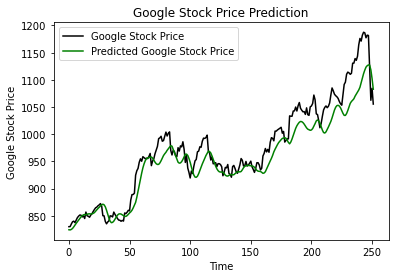

In [19]:
plt.plot(real_stock_price, color = 'black', label = 'Google Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

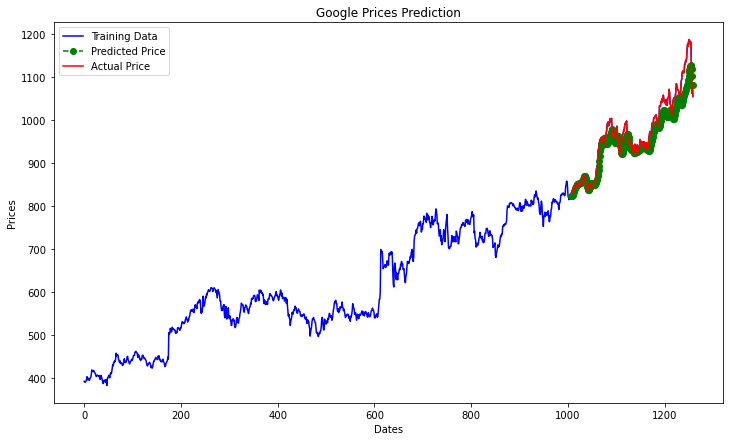

In [23]:
plt.figure(figsize=(12,7))
plt.plot(df['close'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predicted_stock_price, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['close'], color='red', label='Actual Price')
plt.title('Google Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
# plt.xticks(np.arange(0,3018, 300), df['date'][0:3018:300])
plt.legend()